In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt


In [2]:
# Create the DataFrame
data = pd.DataFrame({
    "Condition": ["Sick", "Sick", "Not Sick", "Not Sick"],
    "Test Result": ["Positive", "Negative", "Positive", "Negative"],
    "Probability": [0.009, 0.001, 0.099, 0.891]
})

print(data)


  Condition Test Result  Probability
0      Sick    Positive        0.009
1      Sick    Negative        0.001
2  Not Sick    Positive        0.099
3  Not Sick    Negative        0.891


P(P/S) = P(S/P)*P(P)/P(S)

In [3]:
0.009*(0.009+0.099)/(0.009+0.001)

0.09720000000000001

P(N/NS) = P(NS/N)*P(N)/P(NS)

In [4]:
0.891*(0.001+0.891)/(0.099+0.891)

0.8028000000000001

3a) 0.009
b) P(S/P) = P(P/S)*P(S)/P(P)

In [5]:
0.009*0.01/(0.009+0.099)

0.0008333333333333333

In [ ]:


# Load Iris dataset
iris = sns.load_dataset("iris")

# Use petal_length and petal_width
X = iris[['petal_length', 'petal_width']].values
y = iris['species'].values

# Outer CV: 10-fold CV
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inner CV: 5-fold for model selection
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Discretize continuous features for CategoricalNB
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = est.fit_transform(X)

# Initialize models
gnb = GaussianNB()
cnb = CategoricalNB()

# 1. Nested CV for Gaussian Naive Bayes
gnb_outer_scores = cross_val_score(gnb, X, y, cv=outer_cv, scoring='accuracy')

# 2. Nested CV for Categorical Naive Bayes
# Inner GridSearchCV to "tune" bins
param_grid = {'alpha': [0.1, 0.5, 1.0]}  # Smoothing parameter for CNB
grid_search = GridSearchCV(estimator=cnb, param_grid=param_grid, cv=inner_cv, scoring='accuracy')

cnb_outer_scores = cross_val_score(grid_search, X_binned, y, cv=outer_cv, scoring='accuracy')

# Results
print("Gaussian Naive Bayes Mean Accuracy:", np.mean(gnb_outer_scores))
print("Categorical Naive Bayes Mean Accuracy:", np.mean(cnb_outer_scores))


Gaussian Naive Bayes Mean Accuracy: 0.96
Categorical Naive Bayes Mean Accuracy: 0.9466666666666667


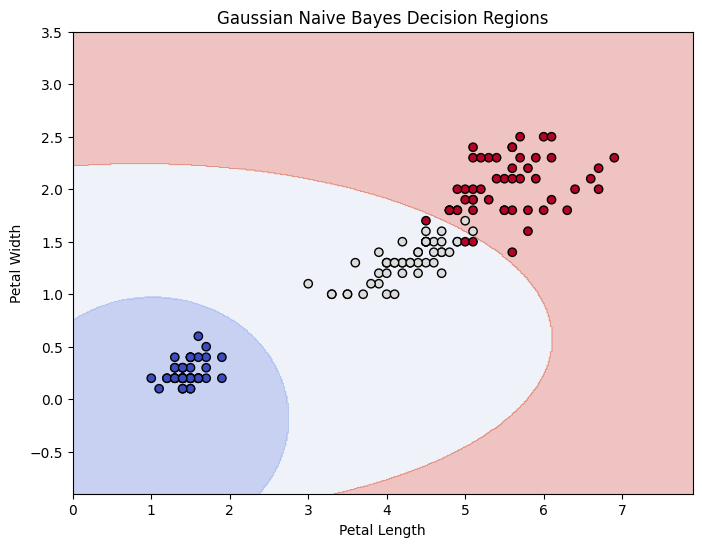

In [ ]:
# Load Iris dataset
iris = sns.load_dataset("iris")

# Extract features (petal_length and petal_width)
X = iris[['petal_length', 'petal_width']].values

# Convert species to numeric codes (0, 1, 2)
y = iris['species'].astype('category').cat.codes  # Convert to numeric labels

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X, y)

# Plot decision regions
def plot_decision_regions(X, y, model, title="Decision Regions"):
    # Define mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict across the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)
    plt.show()

# Plot decision regions for GaussianNB
plot_decision_regions(X, y, gnb, title="Gaussian Naive Bayes Decision Regions")
